In [3]:
from urllib import request

url = 'https://s3-ap-northeast-1.amazonaws.com/ai-std/lena.png'
request.urlretrieve(url, 'lenna.png')

('lenna.png', <http.client.HTTPMessage at 0x113eacd68>)

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img=cv2.imread('lenna.png')

In [11]:
type(img)

numpy.ndarray

In [12]:
img.shape

(512, 512, 3)

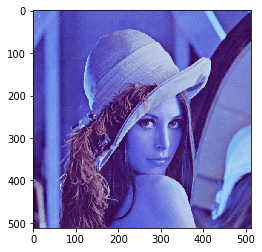

In [13]:
plt.imshow(img)

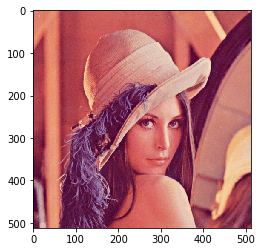

In [14]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [15]:
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
cv2.imwrite('new_lenna.jpg',img)

True

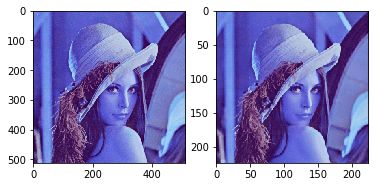

In [16]:
resized=cv2.resize(img,(224,224))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(resized)

In [17]:
print(img.shape)
print(resized.shape)

(512, 512, 3)
(224, 224, 3)


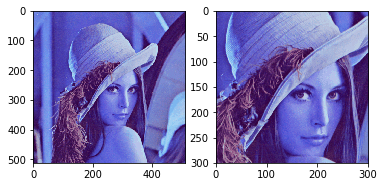

In [18]:
cropped_1=img[100:400,100:400,:]

# クロップを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# クロップを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cropped_1)

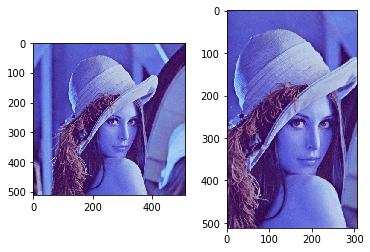

In [19]:
h,w,c=img.shape
cropped_2=img[:,int(w*(1/5)):int(w*(4/5)),:]

# クロップを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# クロップを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cropped_2)

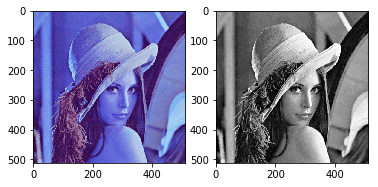

In [21]:
grayed=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(img)
# グレースケール化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(grayed)
plt.gray()

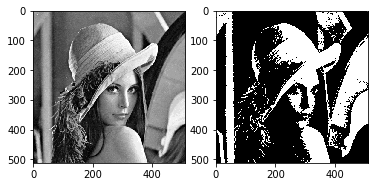

In [22]:
th,binary=cv2.threshold(grayed,125,255,cv2.THRESH_BINARY)

# グレースケール化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(grayed)
# グレースケール化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(binary)
plt.gray()

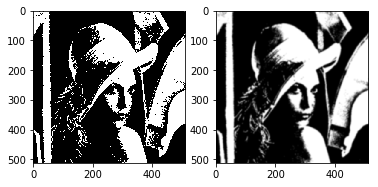

In [23]:
blurred=cv2.GaussianBlur(binary,(11,11),0)

# 平滑化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(binary)
# 平滑化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(blurred)

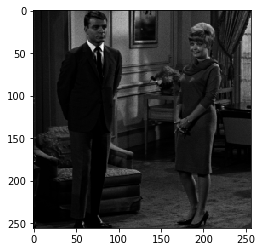

In [24]:
url = 'https://s3-ap-northeast-1.amazonaws.com/ai-std/4.1.02.tiff'
request.urlretrieve(url, '4.1.02.tiff')

img_2 = cv2.imread('4.1.02.tiff', 0)
plt.imshow(img_2)

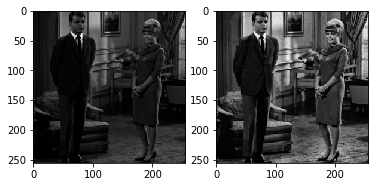

In [25]:
clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
cl1=clahe.apply(img_2)

# 平滑化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img_2)
# 平滑化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cl1)

In [26]:
import pickle
with open('train.pickle', 'rb') as f:
    train = pickle.load(f, encoding='bytes')
X_train = train['data']

X_train /= 255 # 正規化
X_train -= np.mean(X_train) # Mean Substruction

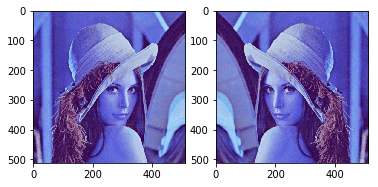

In [27]:
flipped = cv2.flip(img, 1)

# flipを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# flipを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(flipped)

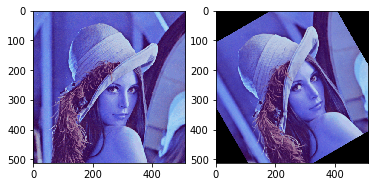

In [28]:
# 表示する画像のサイズ(変換前と同じサイズに指定)
size = (img.shape[0], img.shape[1])
# 回転の中心位置を表す座標（画像の中心に指定）
center = (int(size[0]/2), int(size[1]/2))
# 回転角度
angle = 30
# 拡大･縮小の比率（拡大･縮小なしに指定）
scale = 1.0

# 回転変換を表す行列をつくる
# (中心位置, 回転角度, 拡大･縮小の比率)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
# 回転変換を行う
# (画像, 回転行列, 変換後の画像サイズ)
rotated = cv2.warpAffine(img, rotation_matrix, size)

# rotateを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# rotateを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(rotated)


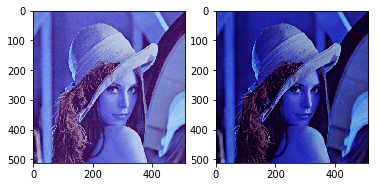

In [29]:
# ガンマ値を指定
gamma = 0.5

# 色対応表を定義
look_up_table = np.zeros((256, 1), dtype='uint8')
# すべての対応表を事前に計算しておく
for i in range(256):
    look_up_table[i][0] = 255 * pow(float(i) / 255, 1.0 / gamma)
img_gamma = cv2.LUT(img, look_up_table)

# ガンマ変換を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# ガンマ変換を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(img_gamma)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


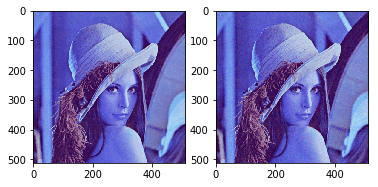

In [30]:
# 変換後の画像のサイズを指定
row, col, ch = img.shape

# ガウス分布の平均と標準編纂を指定
mean = 0
sigma = 5
# imgと同じサイズのノイズ画像を生成
noise = np.random.normal(mean, sigma, (row, col, ch))
noise = noise.reshape(row,col,ch)
# imgにノイズ画像を被せる
noised = img + noise
noised /= 255

# ノイズを加える前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)

# ノイズを加えた後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(noised)

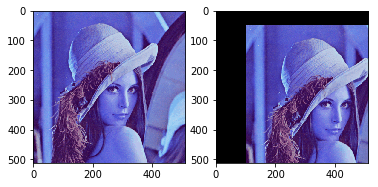

In [31]:
# 変換後の画像のサイズを指定
rows, cols, channnels = img.shape
# 変換行列
M = np.float32([[1,0,100],[0,1,50]])
# 並進移動の実行
moved = cv2.warpAffine(img, M, (cols, rows))

# 並進移動を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# 並進移動を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(moved)

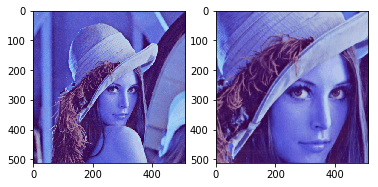

In [32]:
# 画像サイズを一度拡大する
zoomed_in = cv2.resize(img, None, fx=2.0, fy=2.0)

# 変換前後のshapeを指定する
height_1, width_1, channel_1 = img.shape
height_2, width_2, channel_2 = zoomed_in.shape

# x、y軸それぞれの切り取り開始点の決定
# ピクセルの指定は整数になるようにする
x =  int((width_2 - width_1) / 2)
y =  int((height_2 - height_1) / 2)

#切り取り開始点から元の画像分のサイズを切り取る
zoomed_in = zoomed_in[y:y+height_1, x:x+width_1]

# 拡大前の画像を出力
plt.subplot(121)
plt.imshow(img)
# 拡大後の画像を出力
plt.subplot(122)
plt.imshow(zoomed_in)

In [34]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

import keras
from keras.models import Sequential           #層構造のモデルを定義するためのメソッド
from keras.layers import Dense, Activation          #Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import Adam
import tensorflow as tf

Using TensorFlow backend.


In [35]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        list = pickle.load(fo, encoding='bytes')
    return list

In [36]:
train = unpickle('train.pickle')
test = unpickle('test.pickle')
label = unpickle('label.pickle')

In [37]:
N_train = len(train)
N_test = len(test)
X_train = train['data']
X_test = test['data']
y_train = train['label']
y_test = test['label']

#one-hotエンコーディング
Y_train = np.identity(5)[y_train].astype('i')
Y_test = np.identity(5)[y_test].astype('i')

#Opencv, Kerasの仕様のため(サンプル数, height, width, channel)に変換
X_train = X_train.transpose([0, 2, 3, 1])
X_test = X_test.transpose([0, 2, 3, 1])

In [38]:
from keras.layers import Input, Activation, Flatten, Dropout
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

# 入力画像のサイズを指定
input_tensor = Input(shape=(32, 32, 3))

# 学習済みモデルの読み込み
# ダウンロードに数十分かかります
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

ImportError: `load_weights` requires h5py.

In [39]:
# 必要なパラメータの追加
input_height = 32
input_width = 32
n_class = 5

# 学習済みモデルに加える全結合層部分を定義
# 最終層はノード数がクラスラベルの数に一致していないのでスライシングで取り除く
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256))
top_model.add(Activation('relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(n_class))
top_model.add(Activation('softmax'))


NameError: name 'base_model' is not defined

In [ ]:
from keras.models import Model
model = Model(input=base_model.input, output=top_model(base_model.output))